<a href="https://colab.research.google.com/github/Blvisse/WHOProject/blob/master/WHO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from google.colab import files
sns.set_style("darkgrid")


In [3]:
files.upload()

Saving Health Systems Dataset.csv to Health Systems Dataset.csv


{'Health Systems Dataset.csv': b'Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16\rAfghanistan,,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0,42.3,NaN\rAlbania,,Albania,6.7,41.4,58,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53\rAlgeria,,Algeria,6.6,67.7,30.9,260.4,998.2,0,1.8,2.2,12.1,100,NaN\rAndorra,,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4,83.1,100,80\rAngola,,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25,NaN\rAntigua and Barbuda,,Antigua and Barbuda,4.3,60.6,32.2,623.1,976.4,0,2.8,3.1,14,NaN,79\rArgentina,,Argentina,7.5,74.4,15.8,955.2,1531,0.6,4,2.6,50.1,100,100\rArmenia,,Armenia,9.9,16.5,80.6,358.8,876.9,1.7,2.9,5.6,86.7,99.3,76\rAustralia,,Austral

In [4]:
data=pd.read_csv('Health Systems Dataset.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        187 non-null    object 
 1   Province_State                        14 non-null     object 
 2   World_Bank_Name                       210 non-null    object 
 3   Health_exp_pct_GDP_2016               186 non-null    float64
 4   Health_exp_public_pct_2016            186 non-null    float64
 5   Health_exp_out_of_pocket_pct_2016     186 non-null    float64
 6   Health_exp_per_capita_USD_2016        186 non-null    float64
 7   per_capita_exp_PPP_2016               186 non-null    float64
 8   External_health_exp_pct_2016          167 non-null    float64
 9   Physicians_per_1000_2009-18           189 non-null    float64
 10  Nurse_midwife_per_1000_2009-18        189 non-null    float64
 11  Specialist_surgical

# Data Cleaning

In [6]:
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [9]:
data['Country_Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'United Kingdom',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo (Kinshasa)', 'Congo (Brazzaville)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'US',
       'Guatemala', 'Guinea', 

In [10]:
data['Country_Region'].value_counts()

US                4
France            4
United Kingdom    4
China             3
Denmark           3
                 ..
Peru              1
Australia         1
Niger             1
Sudan             1
Monaco            1
Name: Country_Region, Length: 173, dtype: int64

In [11]:
data[data['Country_Region'].isnull()]

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
97,NaN,NaN,Kiribati,11.9,79.6,0.1,188.0,249.8,17.0,0.2,4.8,8.2,94.0,NaN
98,NaN,NaN,"Korea, Dem. People's Rep.",NaN,NaN,NaN,NaN,NaN,NaN,3.7,4.4,NaN,100.0,NaN
100,NaN,NaN,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.7,NaN,NaN
106,NaN,NaN,Lesotho,8.1,63.8,18.9,85.5,242.7,17.3,0.1,0.7,0.6,43.3,NaN
113,NaN,NaN,Malawi,9.8,28.0,11.4,29.6,115.2,53.8,0.0,0.3,0.4,67.2,NaN
118,NaN,NaN,Marshall Islands,23.3,52.6,9.0,851.3,934.4,35.4,0.5,3.5,15.9,84.0,NaN
122,NaN,NaN,"Micronesia, Fed. Sts.",12.6,27.8,2.6,386.7,431.6,69.2,0.2,3.3,7.0,NaN,NaN
129,NaN,NaN,Myanmar,5.1,20.1,74.0,62.1,291.1,5.9,0.9,1.0,2.4,81.3,NaN
139,NaN,NaN,Northern Mariana Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
143,NaN,NaN,Palau,11.7,59.8,14.5,1674.1,1891.9,15.4,1.2,5.3,NaN,NaN,NaN


In [12]:
data.loc[97,'Country_Region']='Kiribati'
data.loc[98,'Country_Region']='North Korea'
data.loc[100,'Country_Region']='Serbia'
data.loc[100,'Province_State']='Kosovo'
data.loc[106,'Country_Region']='Lesotho'
data.loc[113,'Country_Region']='Malawi'
data.loc[118,'Country_Region']='Marshall Islands'
data.loc[122,'Country_Region']='Federated States of Micronesia'
data.loc[129,'Country_Region']='Myanmar'
data.loc[139,'Country_Region']='US'
data.loc[139,'Province_State']='Nothern Mariana Islands'
data.loc[143,'Country_Region']='Palau'
data.loc[156,'Country_Region']='Samoa'
data.loc[158,'Country_Region']='Sao Tome and Principe'
data.loc[163,'Country_Region']='Sierra Leone'
data.loc[168,'Country_Region']='Solomon Islands'
data.loc[171,'Country_Region']='South Sudan'
data.loc[183,'Country_Region']='Tajikstan'
data.loc[188,'Country_Region']='Tonga'
data.loc[192,'Country_Region']='Turkmenistan'
data.loc[193,'Country_Region']='United Kingdom'
data.loc[193,'Province_State']='Turks and Caicos Islands'
data.loc[194,'Country_Region']='Tuvalu'
data.loc[202,'Country_Region']='Vunuatu'
data.loc[206,'Country_Region']='Palestine'
data.loc[206,'Province_State']='West Bank and Gaza'
data.loc[207,'Country_Region']='Republic of Yemen'


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   Province_State                        18 non-null     object 
 2   World_Bank_Name                       210 non-null    object 
 3   Health_exp_pct_GDP_2016               186 non-null    float64
 4   Health_exp_public_pct_2016            186 non-null    float64
 5   Health_exp_out_of_pocket_pct_2016     186 non-null    float64
 6   Health_exp_per_capita_USD_2016        186 non-null    float64
 7   per_capita_exp_PPP_2016               186 non-null    float64
 8   External_health_exp_pct_2016          167 non-null    float64
 9   Physicians_per_1000_2009-18           189 non-null    float64
 10  Nurse_midwife_per_1000_2009-18        189 non-null    float64
 11  Specialist_surgical

In [19]:
data[data['Province_State'].notnull()]

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
32,United Kingdom,Cayman Islands,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.8,NaN,NaN
35,United Kingdom,Channel Islands,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7,NaN,NaN
38,China,Hong Kong,"Hong Kong SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,NaN
39,China,Macau,"Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,Denmark,Faroe Islands,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
66,France,French Polynesia,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6,NaN,NaN
73,Denmark,Greenland,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75,US,Guam,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,United Kingdom,Isle of Man,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.3,52.4,85.4,NaN
100,Serbia,Kosovo,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.7,NaN,NaN


In [21]:
data.head()

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
0,Afghanistan,NaN,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN,0
1,Albania,NaN,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,0
2,Algeria,NaN,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN,0
3,Andorra,NaN,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0,0
4,Angola,NaN,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN,0


In [22]:
data[data['Province_State'].notnull()]

,Country_Region,Province_State,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
32,United Kingdom,Cayman Islands,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.8,NaN,NaN,1
35,United Kingdom,Channel Islands,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7,NaN,NaN,1
38,China,Hong Kong,"Hong Kong SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,NaN,1
39,China,Macau,"Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,Denmark,Faroe Islands,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
66,France,French Polynesia,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6,NaN,NaN,1
73,Denmark,Greenland,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
75,US,Guam,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
89,United Kingdom,Isle of Man,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.3,52.4,85.4,NaN,1
100,Serbia,Kosovo,Kosovo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.7,NaN,NaN,1


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   Province_State                        18 non-null     object 
 2   World_Bank_Name                       210 non-null    object 
 3   Health_exp_pct_GDP_2016               186 non-null    float64
 4   Health_exp_public_pct_2016            186 non-null    float64
 5   Health_exp_out_of_pocket_pct_2016     186 non-null    float64
 6   Health_exp_per_capita_USD_2016        186 non-null    float64
 7   per_capita_exp_PPP_2016               186 non-null    float64
 8   External_health_exp_pct_2016          167 non-null    float64
 9   Physicians_per_1000_2009-18           189 non-null    float64
 10  Nurse_midwife_per_1000_2009-18        189 non-null    float64
 11  Specialist_surgical

In [31]:
data.drop(labels=['Province_State'],axis=1,inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   World_Bank_Name                       210 non-null    object 
 2   Health_exp_pct_GDP_2016               186 non-null    float64
 3   Health_exp_public_pct_2016            186 non-null    float64
 4   Health_exp_out_of_pocket_pct_2016     186 non-null    float64
 5   Health_exp_per_capita_USD_2016        186 non-null    float64
 6   per_capita_exp_PPP_2016               186 non-null    float64
 7   External_health_exp_pct_2016          167 non-null    float64
 8   Physicians_per_1000_2009-18           189 non-null    float64
 9   Nurse_midwife_per_1000_2009-18        189 non-null    float64
 10  Specialist_surgical_per_1000_2008-18  175 non-null    float64
 11  Completeness_of_bir

In [33]:
data[data['Health_exp_pct_GDP_2016'].isnull()]

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
32,United Kingdom,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.8,NaN,NaN,1
35,United Kingdom,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7,NaN,NaN,1
38,China,"Hong Kong SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,NaN,1
39,China,"Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,Denmark,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
66,France,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6,NaN,NaN,1
73,Denmark,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
75,US,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
89,United Kingdom,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.3,52.4,85.4,NaN,1
98,North Korea,"Korea, Dem. People's Rep.",NaN,NaN,NaN,NaN,NaN,NaN,3.7,4.4,NaN,100.0,NaN,0


In [34]:
data.loc[171,'Country_Region']='Sudan'
data.loc[171,'Is_Territory']=1

In [35]:
data[data['Health_exp_pct_GDP_2016'].isnull()]

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
32,United Kingdom,Cayman Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,156.8,NaN,NaN,1
35,United Kingdom,Channel Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.7,NaN,NaN,1
38,China,"Hong Kong SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,27.8,NaN,NaN,1
39,China,"Macao SAR, China",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
62,Denmark,Faroe Islands,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
66,France,French Polynesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.6,NaN,NaN,1
73,Denmark,Greenland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
75,US,Guam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
89,United Kingdom,Isle of Man,NaN,NaN,NaN,NaN,NaN,NaN,1.4,2.3,52.4,85.4,NaN,1
98,North Korea,"Korea, Dem. People's Rep.",NaN,NaN,NaN,NaN,NaN,NaN,3.7,4.4,NaN,100.0,NaN,0


In [36]:
data['Health_exp_pct_GDP_2016'].fillna(0,inplace=True)

In [37]:
data[data['Health_exp_pct_GDP_2016'].isnull()]

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory


In [39]:
data['Health_exp_public_pct_2016'].fillna(0,inplace=True)

In [40]:
data['Health_exp_per_capita_USD_2016'].fillna(0,inplace=True)

In [41]:
data['Health_exp_out_of_pocket_pct_2016'].fillna(0,inplace=True)

In [42]:
data['per_capita_exp_PPP_2016'].fillna(0,inplace=True)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   World_Bank_Name                       210 non-null    object 
 2   Health_exp_pct_GDP_2016               210 non-null    float64
 3   Health_exp_public_pct_2016            210 non-null    float64
 4   Health_exp_out_of_pocket_pct_2016     210 non-null    float64
 5   Health_exp_per_capita_USD_2016        210 non-null    float64
 6   per_capita_exp_PPP_2016               210 non-null    float64
 7   External_health_exp_pct_2016          167 non-null    float64
 8   Physicians_per_1000_2009-18           189 non-null    float64
 9   Nurse_midwife_per_1000_2009-18        189 non-null    float64
 10  Specialist_surgical_per_1000_2008-18  175 non-null    float64
 11  Completeness_of_bir

In [44]:
data[data['External_health_exp_pct_2016'].isnull()]

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
3,Andorra,Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0,0
9,Austria,Austria,10.4,72.5,18.9,4688.3,5295.2,NaN,5.1,8.2,109.9,100.0,100.0,0
25,Bulgaria,Bulgaria,8.2,50.6,48.0,612.5,1577.9,NaN,4.0,5.3,112.7,100.0,100.0,0
31,Canada,Canada,10.5,73.4,14.6,4458.2,4718.3,NaN,2.6,9.9,43.9,100.0,100.0,0
32,United Kingdom,Cayman Islands,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,156.8,NaN,NaN,1
35,United Kingdom,Channel Islands,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,38.7,NaN,NaN,1
38,China,"Hong Kong SAR, China",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,27.8,NaN,NaN,1
39,China,"Macao SAR, China",0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1
46,Croatia,Croatia,7.2,78.2,15.4,884.5,1705.2,NaN,3.0,8.1,81.2,100.0,100.0,0
49,Czechia,Czech Republic,7.1,81.9,15.0,1321.6,2484.6,NaN,4.3,8.4,124.5,100.0,100.0,0


In [45]:
data['External_health_exp_pct_2016'].fillna(0,inplace=True)

In [58]:
data['Country_Region'].value_counts().reset_index(name='count').query('count > 2')

,index,count
0,US,5
1,United Kingdom,5
2,France,4
3,Denmark,3
4,China,3


In [48]:
data['Completeness_of_birth_reg_2009-18'].fillna(0,inplace=True)
data['Completeness_of_death_reg_2008-16'].fillna(0,inplace=True)

In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   World_Bank_Name                       210 non-null    object 
 2   Health_exp_pct_GDP_2016               210 non-null    float64
 3   Health_exp_public_pct_2016            210 non-null    float64
 4   Health_exp_out_of_pocket_pct_2016     210 non-null    float64
 5   Health_exp_per_capita_USD_2016        210 non-null    float64
 6   per_capita_exp_PPP_2016               210 non-null    float64
 7   External_health_exp_pct_2016          210 non-null    float64
 8   Physicians_per_1000_2009-18           189 non-null    float64
 9   Nurse_midwife_per_1000_2009-18        189 non-null    float64
 10  Specialist_surgical_per_1000_2008-18  175 non-null    float64
 11  Completeness_of_bir

In [50]:
data.fillna(0,inplace=True)

In [53]:
masters=data['Country_Region'].value_counts()

In [54]:
masters

US                5
United Kingdom    5
France            4
Denmark           3
China             3
                 ..
Thailand          1
Syria             1
Peru              1
Australia         1
Monaco            1
Name: Country_Region, Length: 192, dtype: int64

In [57]:
print(masters[masters>2])

US                5
United Kingdom    5
France            4
Denmark           3
China             3
Name: Country_Region, dtype: int64


In [61]:
data['World_Bank_Name'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Channel Islands', 'Chile',
       'China', 'Hong Kong SAR, China', 'Macao SAR, China', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador',
       'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea',
       'Estonia', 'Eswatini', 'Ethiopia', 'Faroe Islands', 'Fiji',
       'Finland', 'Fra

In [60]:
data[data['World_Bank_Name']=='France']

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory
65,France,France,11.5,82.9,9.8,4263.4,4782.3,0.0,3.2,9.7,58.6,100.0,100.0,0


In [62]:
conditions= [
             (data['World_Bank_Name']=='France'),
             (data['World_Bank_Name']=='United Kingdom'),
             (data['World_Bank_Name']=='United States'),
             (data['World_Bank_Name']=='China'),
             (data['World_Bank_Name']=='Denmark')
]

values=[1,1,1,1,1]

data['Has_Territories']=np.select(conditions,values)

In [63]:
data.head()

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory,Has_Territories
0,Afghanistan,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0,0,0
1,Albania,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,0,0
2,Algeria,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0,0,0
3,Andorra,Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0,0,0
4,Angola,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0,0,0


In [64]:
data[data['World_Bank_Name']=='France']

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory,Has_Territories
65,France,France,11.5,82.9,9.8,4263.4,4782.3,0.0,3.2,9.7,58.6,100.0,100.0,0,1


In [65]:
conditions= [
             (data['World_Bank_Name']=='France'),
             (data['World_Bank_Name']=='United Kingdom'),
             (data['World_Bank_Name']=='United States'),
             (data['World_Bank_Name']=='China'),
             (data['World_Bank_Name']=='Denmark')
]

values=[4,5,5,3,3]

data['No_of_Territories']=np.select(conditions,values)

In [66]:
data[data['World_Bank_Name']=='France']

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory,Has_Territories,No_of_Territories
65,France,France,11.5,82.9,9.8,4263.4,4782.3,0.0,3.2,9.7,58.6,100.0,100.0,0,1,4


In [68]:
data[data['World_Bank_Name']=='United States']

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory,Has_Territories,No_of_Territories
199,US,United States,17.1,81.8,11.1,9869.7,9869.7,0.0,2.6,8.6,54.7,100.0,98.0,0,1,5


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 16 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Country_Region                        210 non-null    object 
 1   World_Bank_Name                       210 non-null    object 
 2   Health_exp_pct_GDP_2016               210 non-null    float64
 3   Health_exp_public_pct_2016            210 non-null    float64
 4   Health_exp_out_of_pocket_pct_2016     210 non-null    float64
 5   Health_exp_per_capita_USD_2016        210 non-null    float64
 6   per_capita_exp_PPP_2016               210 non-null    float64
 7   External_health_exp_pct_2016          210 non-null    float64
 8   Physicians_per_1000_2009-18           210 non-null    float64
 9   Nurse_midwife_per_1000_2009-18        210 non-null    float64
 10  Specialist_surgical_per_1000_2008-18  210 non-null    float64
 11  Completeness_of_bir

# Vizualisation

Text(0.5, 1.0, 'Number of countries that are terriories vs those indipendent')

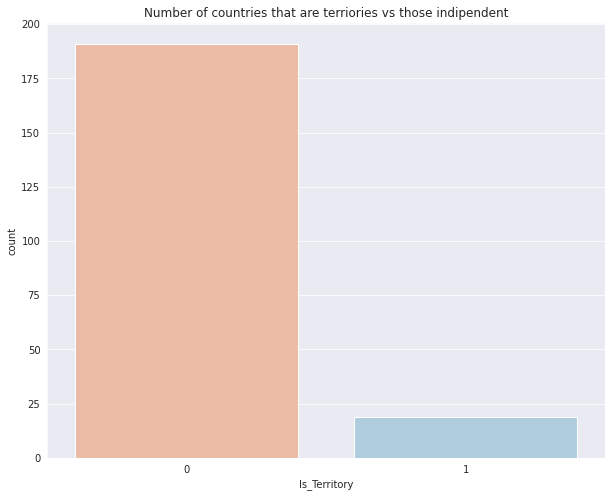

In [110]:
plt.figure(figsize=(10,8))
sns.countplot(data=data,x='Is_Territory',palette='RdBu')
plt.title('Number of countries that are terriories vs those indipendent')

Text(0.5, 1.0, 'Pie chart of indipendent vs Territories')

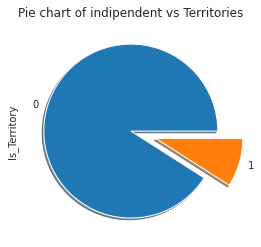

In [111]:
data['Is_Territory'].value_counts().plot.pie(shadow=True,explode=[0,0.3])
plt.title('Pie chart of indipendent vs Territories')

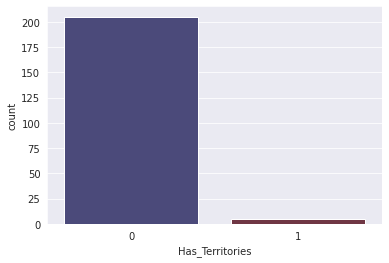

In [112]:
sns.countplot(data=data,x='Has_Territories',palette='icefire')

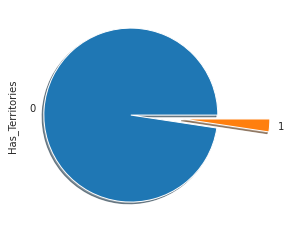

In [113]:
data['Has_Territories'].value_counts().plot.pie(shadow=True,explode=[0,0.6])

In [114]:
fig=go.Figure(data=go.Bar(x=data['World_Bank_Name'],y=data['Health_exp_pct_GDP_2016']))
fig.show()

In [101]:
fig=px.bar(data,x='World_Bank_Name',y='Health_exp_pct_GDP_2016',color='Has_Territories',title='Health Expenditure Percentage GDP per country 2016',color_discrete_map='RdBu')
fig.show()

In [108]:
fig=px.scatter(data,y='Health_exp_pct_GDP_2016',x='World_Bank_Name',color='Health_exp_public_pct_2016')
fig.show()

In [116]:
fig=px.bar(data,x='World_Bank_Name',y='Health_exp_public_pct_2016',color='Has_Territories',title='Health Expenditure Public Percentage per country 2016',color_discrete_map='RdBu')
fig.show()

In [119]:
fig=px.bar(data,x='World_Bank_Name',y='Health_exp_out_of_pocket_pct_2016',color='Has_Territories',title='Health expenditure from out of pocket(individuals) percentage in 2016 in various countries',color_discrete_map='RdBu')
fig.show()

In [118]:
fig=px.scatter(data,y='Health_exp_pct_GDP_2016',x='World_Bank_Name',color='Health_exp_public_pct_2016',size='Health_exp_out_of_pocket_pct_2016')
fig.show()

In [120]:
fig=px.bar(data,x='World_Bank_Name',y='Health_exp_per_capita_USD_2016',color='Has_Territories',title='Health expenditure from out of pocket(individuals) percentage in 2016 in various countries',color_discrete_map='RdBu')
fig.show()

In [135]:
fig=go.Figure(data=[go.Bar(x=data['World_Bank_Name'],y=data['Health_exp_out_of_pocket_pct_2016'],name='Health Expenidture out of pocket'),
                    go.Bar(x=data['World_Bank_Name'],y=data['Health_exp_pct_GDP_2016'],name='Health expenditure per GDP'),
                    # go.Bar(x=data['World_Bank_Name'],y=data['Health_exp_per_capita_USD_2016'],name='Health expenditure per capita in USD'),
                    go.Bar(x=data['World_Bank_Name'],y=data['Health_exp_public_pct_2016'],name='Health expenditure from public')
                    ])
fig.update_layout(barmode='stack')
fig.show()


In [138]:
fig=px.scatter(data,y='per_capita_exp_PPP_2016',x='World_Bank_Name',color='Health_exp_per_capita_USD_2016',size='Health_exp_per_capita_USD_2016',title='Health per capita in 2016 as per country')
fig.show()

In [140]:
fig=px.bar(data,x='World_Bank_Name',y='per_capita_exp_PPP_2016',color='Has_Territories',title='Health per capita in 2016 as per country',color_discrete_map='RdBu')
fig.show()

In [145]:
fig=px.bar(data,x='World_Bank_Name',y='External_health_exp_pct_2016',color='Is_Territory',title='External health expenditure support countries receive from other countries',color_discrete_map='RdBu')
fig.show()

In [150]:
fig=px.scatter(data,y='External_health_exp_pct_2016',x='World_Bank_Name',color='per_capita_exp_PPP_2016',size='per_capita_exp_PPP_2016',title='External Health aid pct from other countries in regards with per capita of the country')
fig.show()

In [153]:
fig=px.bar(data,x='World_Bank_Name',y='Physicians_per_1000_2009-18',color='Has_Territories',title='Physicians per 1000 people in the years 2009-2018 per country',color_discrete_map='RdBu')
fig.show()

In [170]:
fig=px.scatter(data,x='World_Bank_Name',y='Physicians_per_1000_2009-18')
fig.show()

In [155]:
fig=px.bar(data,x='World_Bank_Name',y='Nurse_midwife_per_1000_2009-18',color='Has_Territories',title='External health expenditure support countries receive from other countries',color_discrete_map='RdBu')
fig.show()

In [157]:
fig=px.bar(data,x='World_Bank_Name',y='Specialist_surgical_per_1000_2008-18',color='Has_Territories',title='Surgical specialists per 1000 people between the years 2008 and 2018 per each country',color_discrete_map='RdBu')
fig.show()

In [163]:

fig=px.bar(data,x='World_Bank_Name',y='Completeness_of_birth_reg_2009-18',color='Has_Territories',title='Registered Births from 2009 to 2018',color_discrete_map='RdBu')
fig.show()

In [162]:

fig=px.bar(data,x='World_Bank_Name',y='Completeness_of_death_reg_2008-16',color='Has_Territories',title='Registered deaths from 2009 to 2018',color_discrete_map='RdBu')
fig.show()

In [166]:
fig=go.Figure(data=[go.Bar(x=data['World_Bank_Name'],y=data['Completeness_of_birth_reg_2009-18'],name='Registered Births'),
                    go.Bar(x=data['World_Bank_Name'],y=data['Completeness_of_death_reg_2008-16'],name='Registred Deaths')
                    
                    ])
fig.update_layout(barmode='stack')
fig.show()


In [179]:
fig=px.pie(data,names='No_of_Territories',title='Pie chart represening countries with the percentage of territories')
fig.show()


# Data Preprocessing

In [180]:
whoData=data.copy()

In [181]:
whoData.head()

,Country_Region,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_1000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16,Is_Territory,Has_Territories,No_of_Territories
0,Afghanistan,Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,0.0,0,0,0
1,Albania,Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0,0,0,0
2,Algeria,Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,0.0,0,0,0
3,Andorra,Andorra,10.4,49.1,41.7,3834.7,4978.7,0.0,3.3,4.0,83.1,100.0,80.0,0,0,0
4,Angola,Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,0.0,25.0,0.0,0,0,0


In [186]:
whoData.drop(labels=['Country_Region','World_Bank_Name'],axis=1,inplace=True)

In [182]:
from sklearn.neighbors import NearestNeighbors

In [185]:
KNB=NearestNeighbors(n_neighbors=2)

In [187]:
KNB.fit(whoData)
distances,indices=KNB.kneighbors(whoData)

In [188]:
indices

array([[  0, 207],
       [  1, 190],
       [  2,  22],
       [  3,  16],
       [  4, 209],
       [  5,  54],
       [  6, 104],
       [  7, 138],
       [  8,  83],
       [  9,  88],
       [ 10,  15],
       [ 11, 143],
       [ 12, 144],
       [ 13,  34],
       [ 14,  44],
       [ 15, 192],
       [ 16,  93],
       [ 17,  56],
       [ 18, 116],
       [ 19,  43],
       [ 20,  94],
       [ 21, 153],
       [ 22, 130],
       [ 23, 144],
       [ 24, 149],
       [ 25,  86],
       [ 26, 187],
       [ 27,  68],
       [ 28, 204],
       [ 29,  84],
       [ 30, 131],
       [ 31,  65],
       [ 32,  35],
       [ 33,  27],
       [ 34,  13],
       [ 35,  66],
       [ 36,  59],
       [ 37, 146],
       [ 38, 100],
       [ 62,  39],
       [ 40, 146],
       [ 41, 187],
       [ 42,  33],
       [ 43,  84],
       [ 44, 174],
       [ 45, 103],
       [ 46, 149],
       [ 47, 189],
       [ 48,  72],
       [ 49, 197],
       [ 50, 180],
       [ 51, 145],
       [ 52,

In [189]:
distances

array([[0.00000000e+00, 2.90432436e+01],
       [0.00000000e+00, 5.66836837e+01],
       [0.00000000e+00, 1.40787464e+02],
       [0.00000000e+00, 4.44993067e+02],
       [0.00000000e+00, 2.98857826e+01],
       [0.00000000e+00, 1.55182538e+02],
       [0.00000000e+00, 1.07433468e+02],
       [0.00000000e+00, 9.89731277e+01],
       [0.00000000e+00, 2.97047353e+02],
       [0.00000000e+00, 8.05228539e+01],
       [0.00000000e+00, 1.76108802e+02],
       [0.00000000e+00, 4.93297648e+02],
       [0.00000000e+00, 1.62132292e+02],
       [0.00000000e+00, 1.63884105e+01],
       [0.00000000e+00, 2.87526155e+02],
       [0.00000000e+00, 1.73127005e+02],
       [0.00000000e+00, 1.24268902e+02],
       [0.00000000e+00, 6.42443772e+01],
       [0.00000000e+00, 1.41739197e+01],
       [0.00000000e+00, 5.68575413e+01],
       [0.00000000e+00, 6.69634229e+01],
       [0.00000000e+00, 5.42679463e+01],
       [0.00000000e+00, 4.61541981e+01],
       [0.00000000e+00, 6.02023255e+01],
       [0.000000

In [190]:
KNB.kneighbors_graph(whoData).toarray()

array([[1., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])